<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Выбросы-(оutliers)" data-toc-modified-id="Выбросы-(оutliers)-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Выбросы (оutliers)</a></span></li><li><span><a href="#one-hot-encoding" data-toc-modified-id="one-hot-encoding-0.0.2"><span class="toc-item-num">0.0.2&nbsp;&nbsp;</span>one-hot-encoding</a></span></li><li><span><a href="#46.-Ну-а-теперь-все-вместе.--(★★★★★★★★★★)" data-toc-modified-id="46.-Ну-а-теперь-все-вместе.--(★★★★★★★★★★)-0.0.3"><span class="toc-item-num">0.0.3&nbsp;&nbsp;</span><strong>46.</strong> Ну а теперь все вместе.  (★★★★★★★★★★)</a></span></li></ul></li></ul></li><li><span><a href="#Regular-expressions-with-Pandas" data-toc-modified-id="Regular-expressions-with-Pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regular expressions with Pandas</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

**1\.** Как создать pd.Series из листа, numpy array и словаря(dict)? (★☆☆)

In [21]:
mylist = list('abcedfghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))

#your code
pd.Series(mylist)
pd.Series(myarr)
pd.Series(mydict)

a     0
b     1
c     2
e     3
d     4
f     5
g     6
h     7
i     8
j     9
k    10
l    11
m    12
n    13
o    14
p    15
q    16
r    17
s    18
t    19
u    20
v    21
w    22
x    23
y    24
z    25
dtype: int64

**2\.** Как сделать превратить индексы из датафрейма в колонку? (★☆☆)

In [36]:
df=pd.DataFrame(['a', 'b', 'c'])

#your code
df['seq'] = df.index
df.set_index(0)

,seq
0,
a,0
b,1
c,2


**3\.** Как из нескольких pd.Series сделать один датафрейм? (★★☆)

(hint: pd.concat или словарь с колонками)

In [58]:
df1=pd.Series(['a', 'b', 'c'])
df2=pd.Series(['aa', 'b1', 'c2'])
df3=pd.Series(['44', '55', '66'])

#your code
df = pd.concat([df1, df2, df3], ignore_index=True, axis=1)
df = pd.DataFrame(df)
print(type(df), df)

# or
d = {'A': df1, 'B': df2, 'C': df3}
pd.DataFrame(data = d)

<class 'pandas.core.frame.DataFrame'>    0   1   2
0  a  aa  44
1  b  b1  55
2  c  c2  66


,A,B,C
0,a,aa,44
1,b,b1,55
2,c,c2,66


**4\.** Как получить строки из series A, которые не содержатся в series B? (★★☆)

In [75]:
df1=pd.Series(['a', 'b', 'c'])
df2=pd.Series(['a', 'b1', 'c2'])

#your code
df1[df1.values != df2.values].values

array(['b', 'c'], dtype=object)

**5\.** Как получить из series/dataframe минимум, 25й персентиль, медиану, 75тый персентиль, максимум? (★☆☆)

(hint: использовать одну команду)

In [80]:
df1=pd.Series(np.arange(10, 99))

#your code
df1.describe()

count    89.000000
mean     54.000000
std      25.836021
min      10.000000
25%      32.000000
50%      54.000000
75%      76.000000
max      98.000000
dtype: float64

**6\.** Как получить частоту\долю для всех уникальных объектов в series? (★☆☆)

In [95]:
df1=pd.Series(['a', 'b', 'c', 'g', 'v', 'a', 'a', 'a', 'u', 'a', 'b', 'c', 'c'])

#your code
df1.value_counts(normalize=True)

a    0.384615
c    0.230769
b    0.153846
g    0.076923
v    0.076923
u    0.076923
dtype: float64

**7\.** Как оставить только топ-2 самых часто встречающихся значений, а все остальные значения заменить на 'other'?  (★★☆)

In [3]:
df1=pd.Series(['a', 'b', 'c', 'g', 'v', 'a', 'a', 'a', 'u', 'a', 'b', 'c', 'c'])

#your code
df1 = df1.value_counts()
df1[2:] = 'other'
df1

a        5
c        3
b    other
g    other
v    other
u    other
dtype: object

In [76]:
df1=pd.Series(['a', 'b', 'c', 'g', 'v', 'a', 'a', 'a', 'u', 'a', 'b', 'c', 'c'])

#your code
# df1[df1.keys == df1.value_counts()[2:]]
df1.value_counts()[2:]
df1.value_counts()[:2] = np.NaN
df2 = df1.value_counts()[:2]
# df1[df1.values == df2.index]
# df1.DataFram/ - pd.Series(df2.index)
# df1[df1 == df2.index]
# df1[df1 in df2.index]

df1.apply(lambda i : i if i in df2.index else 'other')

0         a
1     other
2         c
3     other
4     other
5         a
6         a
7         a
8     other
9         a
10    other
11        c
12        c
dtype: object

**8\.** Как разбить колонку с числовыми значениями на 10 групп одинакового размера?  (★★☆)

(hint: pd.qcut)

In [88]:
s = pd.Series(np.random.random(20))

#your code
qua = pd.qcut(s, 10)
gr = s.groupby(qua)
gr.size()

(-0.00051, 0.0857]    2
(0.0857, 0.126]       2
(0.126, 0.166]        2
(0.166, 0.235]        2
(0.235, 0.263]        2
(0.263, 0.331]        2
(0.331, 0.392]        2
(0.392, 0.506]        2
(0.506, 0.679]        2
(0.679, 0.951]        2
dtype: int64

**9\.** Как найти позиции чисел, которые делятся на 3 без остатка из series?  (★★☆)

(можно с помощью numpy и с помощью pandas)

In [99]:
s = pd.Series(range(2,25,2))
d3 = s[s.values % 3 == 0].index
print('Answer:',d3)
s

Answer: Int64Index([2, 5, 8, 11], dtype='int64')


0      2
1      4
2      6
3      8
4     10
5     12
6     14
7     16
8     18
9     20
10    22
11    24
dtype: int64

**10\.** Как извлечь из series строки по индексам?  (★☆☆)

In [100]:
s = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

#your code
s[pos]

0     a
4     e
8     i
14    o
20    u
dtype: object

**11\.** Как сделать stack двух series вертикально и горизонтально? (★☆☆)

(hint: pd.append, pd.concat)

In [112]:
s1 = pd.Series(range(5))
s2 = pd.Series(list('abcde'))

#your code
print(s1.append(s2, ignore_index=True))
# and
pd.concat([s1, s2], axis=0)
# or 
pd.concat([s1, s2], axis=1)

0    0
1    1
2    2
3    3
4    4
5    a
6    b
7    c
8    d
9    e
dtype: object


,0,1
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


**12\.** Как получить позиции строк из series A из другого series B? (★☆☆)

(можно с помощью numpy и с помощью pandas)

In [121]:
s1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
s2 = pd.Series([1, 3, 10, 13])

#your code
# s1[s1 == s2]

s1.apply(lambda i : i if i in s1 else np.NaN)

0    NaN
1    NaN
2    6.0
3    5.0
4    3.0
5    1.0
6    NaN
7    8.0
8    NaN
dtype: float64

**13\.** Как вычислить среднеквадратическую ошибку для истинных и предсказанных значений? (★★☆)

In [7]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)

#your code
mean_square_error = (truth - pred)**2
pd.Series.mean(mean_square_error)

0.17703416627027516

**14\.** Как конвертировать каждый первый элемент строке в series в верхний регистр? (★★☆)

In [16]:
s = pd.Series(['how', 'to', 'kick', 'ass?'])

#your code
s.apply(lambda string_elem: str(string_elem[0]).upper() + string_elem[1:])

0     How
1      To
2    Kick
3    Ass?
dtype: object

**15\.** Как посчитать количество символов в каждой строке? (★★☆)

In [17]:
s = pd.Series(['how', 'to', 'kick', 'ass?'])

#your code
s.apply(lambda string_elem: len(string_elem))

0    3
1    2
2    4
3    4
dtype: int64

**16\.** Как преобразовать даты в виде строк в timeseries?  (★☆☆)

(hint: pd.to_datetime)

In [19]:
s = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

#your code
pd.to_datetime(s)

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

**17\.** Как получить день месяца, номер недели, день года и день недели из даты в виде строки? (★★☆)

In [60]:
s = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

#your code
s = pd.to_datetime(s)

print("Date: ",                   s.dt.date.to_string(index=False).replace('\n', ' '))

print("Week number: ",            s.dt.week.to_string(index=False).replace('\n', ' '))

print("Day number of year: ",     s.dt.dayofyear.to_string(index=False).replace('\n', ' '))

print("Day of week: ",            s.dt.day_name().to_string(index=False).replace('\n', ' '))



Date:   2010-01-01  2011-02-02  2012-03-03  2013-04-04  2014-05-05  2015-06-06
Week number:   53   5   9  14  19  23
Day number of year:     1   33   63   94  125  157
Day of week:      Friday  Wednesday   Saturday   Thursday     Monday   Saturday


**18\.** Как конвертировать дату из формата месяц-год в формат год-месяц-первое число? (★★☆)

(hint: .strftime('%Y-%m-%d'))

In [69]:
s = pd.Series(['Jan 2017', 'Feb 2019', 'Mar 2012'])

#your code
s = pd.to_datetime(s)
s.dt.strftime('%Y-%m-%d')

0    2017-01-01
1    2019-02-01
2    2012-03-01
dtype: object

**19\.** Как отфильтровать слова, содержащие не менее 2 гласных? (★★☆)

In [90]:
s = pd.Series(['Kitty', 'Cat', 'Plan', 'Python', 'Money'])

#your code
s[s.str.count(r'[aeiouy]') > 2]

4    Money
dtype: object

**20\.** Заполните все пропущенные даты от минимальной до максимальной, значения при этом дожны быть равны предыдущей не пропущеной дате (★★★)

In [100]:
s = pd.Series([1,10,3,np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))

#your code
s.asfreq(freq='D', method='ffill')

2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     NaN
Freq: D, dtype: float64

**21\.** Считайте файл из CSV-файла по строчно и добавьте считанные строки в датафрейм (файл data/BostonHousing.csv)?  (★★☆)

(hint: csv reader)

In [44]:
pd.read_csv('data/boston_house_prices.csv')

,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22


In [28]:
import csv
df = pd.DataFrame()
with open('data/boston_house_prices.csv') as file:
    csv_iter =  csv.reader(file)
    next(csv_iter)
    for row in csv_iter:
        df = df.append([row], ignore_index=True)
    df.set_index(1)
df.columns = df.loc[0]
df.drop([0, 1]).reset_index(drop=True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
1,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
4,0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
501,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,20.6
502,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
503,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22


**22\.** Как изменить значения столбца при импорте csv в фрейм данных?
Импортируйте датасет с помощью pd.read_csv, но колонку 'medv' (median house value) измените так, что если value < 25 = ‘Low’ и если > 25 = ‘High’.  (★★☆)

(hint: pd.read_csv(....., converts={}))

In [22]:
df = pd.read_csv('data/boston_house_prices.csv', 
                 converters={ 'MEDV': 
                     lambda x: 'Low' 
                         if float(x) < 25.0 
                         else ('High' 
                               if float(x) > 25.0 
                               else x)
                 },
                 header=1)
df['MEDV'].value_counts()

Low     374
High    124
25        8
Name: MEDV, dtype: int64

**23\.** Как импортировать только указанные столбцы('crim' и 'medv') и только n строк из CSV-файла?  (★☆☆)

In [21]:
select_columns = ['CRIM', 'MEDV']
n = 333
df = pd.read_csv('data/boston_house_prices.csv', 
                 usecols = select_columns,
                 nrows = n,
                 header=1)
df

,CRIM,MEDV
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2
...,...,...
328,0.06617,19.3
329,0.06724,22.6
330,0.04544,19.8
331,0.05023,17.1


**24\.** Как получить кол-во строк, кол-во столбцов, тип столбцов, кол-во столбцов с таким типом данных, итоговую статистику каждого столбца датафрейма?  (★☆☆)

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#  number of rows and columns
print('Rows ' + str(df.shape[0]) + ', columns '+ str(df.shape[1]))

# datatypes
print('\nTypes:')
print(df.dtypes)

# how many columns under each dtype
print('\nType counts:')
print(df.dtypes.value_counts())

# summary statistics
df.describe()

Rows 93, columns 27

Types:
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city              float64
MPG.highway           float64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower            float64
RPM                   float64
Rev.per.mile          float64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers            float64
Length                float64
Wheelbase             float64
Width                 float64
Turn.circle           float64
Rear.seat.room        float64
Luggage.room          float64
Weight                float64
Origin                 object
Make                   object
dtype: object

Type counts:
float64    18
object      9
dtype: int64


,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,86.000000,91.000000,88.000000,84.000000,91.000000,91.000000,86.000000,90.000000,87.000000,85.000000,91.000000,89.000000,92.000000,87.000000,88.000000,89.000000,74.000000,86.000000
mean,17.118605,19.616484,21.459091,22.404762,29.065934,2.658242,144.000000,5276.666667,2355.000000,16.683529,5.076923,182.865169,103.956522,69.448276,38.954545,27.853933,13.986486,3104.593023
std,8.828290,9.724280,10.696563,5.841520,5.370293,1.045845,53.455204,605.554811,486.916616,3.375748,1.045953,14.792651,6.856317,3.778023,3.304157,3.018129,3.120824,600.129993
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.825000,12.350000,14.575000,18.000000,26.000000,1.800000,100.750000,4800.000000,2017.500000,14.500000,4.000000,174.000000,98.000000,67.000000,36.000000,26.000000,12.000000,2647.500000
50%,14.600000,17.700000,19.150000,21.000000,28.000000,2.300000,140.000000,5200.000000,2360.000000,16.500000,5.000000,181.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3085.000000
75%,20.250000,23.500000,24.825000,25.000000,31.000000,3.250000,170.000000,5787.500000,2565.000000,19.000000,6.000000,192.000000,110.000000,72.000000,42.000000,30.000000,16.000000,3567.500000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


**25\.** Как извлечь номер строки и столбца конкретной ячейки с заданным критерием? (★☆☆)

In [123]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
rowName = 'Price'

# Get Manufacturer with highest price
highest_price_row = df[df.Price == df[rowName].max()]
print('#1\t', cell.Manufacturer.values[0])

# Get Row and Column number
irow = highest_price_row.index[0]
print('#2\t Row number\t', irow)
clmns = pd.Series(df.columns)
icol = clmns[clmns.values == rowName].index[0]
print('\t Column number\t', icol)

# Get the value
df.loc[irow][icol]
# or
df.loc[irow][rowName]

#1	 Mercedes-Benz
#2	 Row number	 58
	 Column number	 4


61.9

**26\.** Переименнуйте колонку Type в CarType, в столбцах с '.' в названии замените её на '_'. Как добавить ко всем названиям колонок суффиксы?  (★☆☆)

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#your code
df = df.rename(columns={"Type": "CarType"})     # Edit 'Type'
df.columns = df.columns.str.replace('\.', '_')  # Replace '.' with '_'
df.columns + '!'                                # Add suffix '!'

Index(['Manufacturer!', 'Model!', 'CarType!', 'Min_Price!', 'Price!',
       'Max_Price!', 'MPG_city!', 'MPG_highway!', 'AirBags!', 'DriveTrain!',
       'Cylinders!', 'EngineSize!', 'Horsepower!', 'RPM!', 'Rev_per_mile!',
       'Man_trans_avail!', 'Fuel_tank_capacity!', 'Passengers!', 'Length!',
       'Wheelbase!', 'Width!', 'Turn_circle!', 'Rear_seat_room!',
       'Luggage_room!', 'Weight!', 'Origin!', 'Make!'],
      dtype='object')

**27\.** Проверьте есть ли в датафрейме пропуски? Если да, посчитайте кол-во nan\none в каждом столбце датафрейма  (★★☆)

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#your code
df.isna().sum()

Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags                6
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64

**28\.** Как заменить отсутствующие значения нескольких числовых столбцов средним?  (★★☆)

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#your code
print(df.isna().sum().sum())
df = df.fillna(df.mean())
print(df.isna().sum().sum())

138
39


**29\.** Как выбрать конкретный столбец из датафрейма в качестве датафрейма, а не series?  (★☆☆)

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#your code
df[['Price']]

,Price
0,15.9
1,33.9
2,29.1
3,37.7
4,30.0
...,...
88,19.7
89,20.0
90,23.3
91,22.7


**30\.** Как изменить порядок столбцов данных? (☆☆☆)

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#your code
df.reindex(columns=sorted(df.columns))
# or
left_order_column = ['Model', 'Price', 'Manufacturer']
df[ left_order_column + [ col for col in df.columns if col not in left_order_column ] ]

,Model,Price,Manufacturer,Type,Min.Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Integra,15.9,Acura,Small,12.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,Legend,33.9,NaN,Midsize,29.2,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,90,29.1,Audi,Compact,25.9,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,100,37.7,Audi,Midsize,NaN,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,535i,30.0,BMW,Midsize,NaN,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Eurovan,19.7,Volkswagen,Van,16.6,22.7,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Passat,20.0,Volkswagen,Compact,17.6,22.4,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Corrado,23.3,Volkswagen,Sporty,22.9,23.7,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,240,22.7,Volvo,Compact,21.8,23.5,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


**31\.** Как установить количество строк и столбцов, отображаемых в выводе? (☆☆☆)

(hint: pd.set_option)

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#your code
pd.set_option('display.max_rows', 5)
pd.set_option('max_columns', 10)
df

,Manufacturer,Model,Type,Min.Price,Price,...,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,...,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,...,30.0,15.0,3560.0,non-USA,Acura Legend
...,...,...,...,...,...,...,...,...,...,...,...
91,Volvo,240,Compact,21.8,22.7,...,29.5,14.0,2985.0,non-USA,Volvo 240
92,NaN,850,Midsize,24.8,26.7,...,30.0,15.0,3245.0,non-USA,Volvo 850


**32\.** Как получить номер строки, в которой содержится максимальное значение в столбце? (★★☆)

In [90]:
np.random.seed(7)
df = pd.DataFrame(np.random.randint(1, 30, 30).reshape(10,-1), columns=list('abc'))

#your code
pd.set_option('display.max_rows', None)
pd.set_option('max_columns', None)

print(df.idxmax(axis="rows"))
df

a    9
b    5
c    2
dtype: int64


,a,b,c
0,16,5,26
1,23,4,20
2,24,8,29
3,26,15,24
4,9,26,15
5,11,27,9
6,8,7,5
7,17,8,13
8,1,12,24
9,27,7,20


**33\.** Как получить последние n строк датафрейма с суммой строк 100?  (★★★)

In [105]:
# Формулировка задания не четкая.
n = 33
part = len(df)*(n/100)
df.head(int(part))

,a,b,c
0,16,5,26
1,23,4,20
2,24,8,29


### Выбросы (оutliers)

* 5 Ways to Detect Outliers/Anomalies That Every Data Scientist Should Know (Python Code)

https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

**34\.** Как найти и заменить выбросы из столбца Series или датафрейма? (★★★)

Замените все значения из столбца ниже 5того и больше 95го персентиля, на пограничные значения.

(hint: .quantile())

In [126]:
s = pd.Series(np.logspace(-2, 2, 30))
s_r = s.copy()
#your code
s.quantile(.1)
s[s < s.quantile(.5)] = s.quantile(.5)
s[s > s.quantile(.95)] =  s.quantile(.95)
s - s_r

0      1.002635
1      0.998897
2      0.993761
3      0.986706
4      0.977013
5      0.963696
6      0.945401
7      0.920268
8      0.885739
9      0.838302
10     0.773132
11     0.683601
12     0.560600
13     0.391618
14     0.159467
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28    -8.912866
29   -36.123328
dtype: float64

**35\.** Попробуйте реализовать метод Interquartile Range (IQR) (★★★)

Почитать про него можно по ссылке выше.

[]

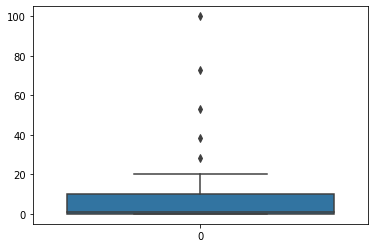

In [110]:
s = pd.Series(np.logspace(-2, 2, 30))

#your code
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=s).plot()

**36\.** Как поменять местами две строки данных? (★★★)

In [169]:
df = pd.DataFrame(np.arange(25).reshape(5, -1))

#your code
display(df)
# df.reindex([0,4])
# df.reindex(index=[0, 1], level=0)

def changeTwoRows(frame, a, b):
    boofer = frame.iloc[b].copy()
    frame.iloc[b] = frame.iloc[a]
    frame.iloc[a] = boofer
    return frame
    
changeTwoRows(df, 0, 4)



,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


,0,1,2,3,4
0,20,21,22,23,24
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,0,1,2,3,4


### one-hot-encoding

**37\.** Как создать однозначные кодировки категориальной переменной? (★★★)

Сделайте one-hot кодировку столбца 'a'.

In [180]:
df = pd.DataFrame([['aa', 'kek'], ['ba', 'lol'], ['ab', 'kek'], ['aa', 'lol'], ['cc', 'kek']], columns=['a', 'b'])

#your code
pd.get_dummies(df.a, prefix='a')

,a_aa,a_ab,a_ba,a_cc
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,0,1


**38\.** Нормализуйте все столбцы в датафрейме. (★★★)

a) Нормализовать все столбцы df путем вычитания среднего значения столбца и деления на стандартное отклонение. 

b) Трансформируйте все столбцы df так, чтобы минимальное значение в каждом столбце было 0, а max = 1.

In [43]:
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))

#your code
display(df)

for label, content in df.items():
    df[label] = (content - content.mean()) / content.std()
display(df)


for label, content in df.items():
    df[label] = (content - content.min()) / (content.max() - content.min())
df

,0,1,2,3,4,5,6,7,8,9
0,9,45,64,34,43,99,93,40,43,9
1,25,73,21,29,44,36,65,37,58,1
2,36,16,83,25,44,35,51,84,15,42
3,31,84,96,80,30,15,78,94,64,49
4,91,81,90,15,52,56,65,80,28,79
5,39,33,72,10,76,67,5,3,8,46
6,88,52,34,48,92,53,75,36,34,71
7,32,3,84,58,80,61,91,26,62,13


,0,1,2,3,4,5,6,7,8,9
0,-1.178233,-0.112430,-0.147528,-0.144100,-0.663611,1.836098,0.983398,-0.310899,0.186675,-1.033394
1,-0.637682,0.820321,-1.733453,-0.357582,-0.618236,-0.664965,-0.013349,-0.404169,0.886706,-1.311281
2,-0.266053,-1.078493,0.553230,-0.528367,-0.618236,-0.704665,-0.511723,1.057058,-1.120050,0.112892
3,-0.434975,1.186759,1.032695,1.819931,-1.253487,-1.498653,0.449426,1.367957,1.166719,0.356043
4,1.592093,1.086821,0.811403,-0.955330,-0.255235,0.129023,-0.013349,0.932698,-0.513356,1.398121
5,-0.164699,-0.512180,0.147528,-1.168812,0.833767,0.565717,-2.149237,-1.461227,-1.446731,0.251835
6,1.490739,0.120758,-1.253987,0.453648,1.559769,0.009925,0.342632,-0.435259,-0.233344,1.120234
7,-0.401190,-1.511556,0.590112,0.880612,1.015268,0.327520,0.912202,-0.746158,1.073381,-0.894450


,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.518519,0.573333,0.342857,0.209677,1.000000,1.000000,0.406593,0.625000,0.102564
1,0.195122,0.864198,0.000000,0.271429,0.225806,0.250000,0.681818,0.373626,0.892857,0.000000
2,0.329268,0.160494,0.826667,0.214286,0.225806,0.238095,0.522727,0.890110,0.125000,0.525641
3,0.268293,1.000000,1.000000,1.000000,0.000000,0.000000,0.829545,1.000000,1.000000,0.615385
4,1.000000,0.962963,0.920000,0.071429,0.354839,0.488095,0.681818,0.846154,0.357143,1.000000
5,0.365854,0.370370,0.680000,0.000000,0.741935,0.619048,0.000000,0.000000,0.000000,0.576923
6,0.963415,0.604938,0.173333,0.542857,1.000000,0.452381,0.795455,0.362637,0.464286,0.897436
7,0.280488,0.000000,0.840000,0.685714,0.806452,0.547619,0.977273,0.252747,0.964286,0.153846


**39\.** Как получить конкретную группу из датафрейма сгруппированного по ключу? (★★★)

Сгруппируйте по 'name', и выведите данные по группе 'orange'.

(hint: groupby(), get_group())

In [53]:
df = pd.DataFrame({'name': ['apple', 'banana', 'orange'] * 3,
                   'taste': np.random.rand(9),
                   'price': np.random.randint(0, 15, 9)})

#your code
grName = df.groupby('name')
grName.get_group('orange')

,name,taste,price
2,orange,0.478573,1
5,orange,0.990613,9
8,orange,0.801047,12


**40\.** Как вычислить среднее значение по столбцу 'price' по каждому фрукту в датафрейме и сохранить сгруппированный столбец как другой столбец (не индекс)? (★★★)

In [67]:
df = pd.DataFrame({'name': ['apple', 'banana', 'orange'] * 3,
                   'taste': np.random.rand(9),
                   'price': np.random.randint(0, 15, 9)})

#your code
df['meanByName'] = df.groupby('name')['price'].transform('mean')
display(df)
# Проверка
df.groupby('name')['price'].mean()

,name,taste,price,meanByName
0,apple,0.806251,13,13
1,banana,0.658983,5,6
2,orange,0.094379,10,6
3,apple,0.010620,13,13
4,banana,0.353796,7,6
5,orange,0.714035,5,6
6,apple,0.437245,13,13
7,banana,0.429215,6,6
8,orange,0.394089,3,6


name
apple     13
banana     6
orange     6
Name: price, dtype: int32

**41\.** Как объединить два датафрейма по двум столбцам, чтобы в них остались только общие строки?  (★★★)

Сделать merge двух датафреймов по колонкам ['fruit', 'weight'] и ['pazham', 'kilo'].

(hint: pd.merge https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#merge )

In [79]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['high', 'medium', 'low'] * 3,
                    'price': np.random.randint(0, 15, 9)})

df2 = pd.DataFrame({'pazham': ['apple', 'orange', 'pine'] * 2,
                    'kilo': ['high', 'low'] * 3,
                    'price': np.random.randint(0, 15, 6)})

#your code
df1.merge(df2, left_on=['fruit', 'weight'], right_on=['pazham', 'kilo'])

,fruit,weight,price_x,pazham,kilo,price_y
0,apple,high,3,apple,high,14
1,apple,high,7,apple,high,14
2,apple,high,8,apple,high,14
3,orange,low,12,orange,low,4
4,orange,low,2,orange,low,4
5,orange,low,7,orange,low,4


**42\.** Как удалить строки из датафрейма А, которые присутствуют в датафрейме B? (★★★)


In [96]:
df1 = pd.DataFrame({'fruit': ['apple', 'orange', 'banana'] * 3,
                    'weight': ['high', 'medium', 'low'] * 3,
                    'price': np.arange(9)})

df2 = pd.DataFrame({'fruit': ['apple', 'orange', 'pine'] * 2,
                    'weight': ['high', 'medium'] * 3,
                    'price': np.arange(6)})

#your code
df = pd.merge(df1, df2, how="outer", indicator=True)
df = df[df['_merge'] == 'left_only']
df.drop(columns=['_merge'])

,fruit,weight,price
2,banana,low,2
3,apple,high,3
4,orange,medium,4
5,banana,low,5
6,apple,high,6
7,orange,medium,7
8,banana,low,8


**43\.** Как получить номера строк, в которых совпадают значения двух столбцов? (★★★)

(hint: np.where)

In [249]:
df = pd.DataFrame({'fruit1': np.random.choice(['apple', 'orange', 'banana'], 10),
                    'fruit2': np.random.choice(['apple', 'orange', 'banana'], 10)})


#your code

df[df.fruit1 != df.fruit2] = np.NaN
np.where(df['fruit1'].notna())

(array([0, 3, 4, 5, 8, 9], dtype=int64),)

**44\.** Создайте столбец a_shift со сдвигом на одну строку назад. (★★★)

(hint: .shift())

In [173]:
df = pd.DataFrame(np.random.randint(1, 100, 20).reshape(-1, 4), columns = list('abcd'))

#your code
# df.shift(periods=-1, axis=1, fill_value=0)
df['a_shift'] = df.a.shift(periods=-1)
df

,a,b,c,d,a_shift
0,80,58,42,45,25.0
1,25,14,57,65,45.0
2,45,34,92,31,72.0
3,72,77,18,29,13.0
4,13,52,40,65,NaN


**45\.** Как разбить текстовый столбец на три отдельных столбца? (★★★)

Разбить на три столбцы STD, City, State

In [167]:
df = pd.DataFrame(["STD, City    State",
"33, Kolkata    West Bengal",
"44, Chennai    Tamil Nadu",
"40, Hyderabad    Telengana",
"80, Bangalore    Karnataka"], columns=['row'])

#your code
df = df['row'].str.split(r',\s|\s{2,}', expand=True)
df.columns = df.loc[0]
df.drop(0)

,STD,City,State
1,33,Kolkata,West Bengal
2,44,Chennai,Tamil Nadu
3,40,Hyderabad,Telengana
4,80,Bangalore,Karnataka


### **46\.** Ну а теперь все вместе.  (★★★★★★★★★★)

* Заменяем все точки в названии на '_'
* Выделить категориальные признаки
* Посчитать кол-во уникальных значений во всех текстовых\категориальных столбцах. 
* Колонки с только уникальными значениями удаляем (например Model и Make)
* Для столбцов у которых значений более 10, оставляем топ 10 значений, остальные заменяем на 'other'
* Числовые столбцы проверяем на пропуски. Подсчитываем кол-во nan\none и делим на размер датафрейма -сохраняем в отдельный датафрейм, это доля пропусков в каждом столбце
* Чистим выбросы. Во всех числовых столбцах заменяем все значения столбца меньше 5го персентиля и больше 95ого персентиля на эти пограничные значения.
* Заполняем пропуски в числовых столбцах на среднее по столбцу, в текстовых столбцах на 'other'
* Все категориальные признаки превращаем в one-hot-encoding
* Создать новый столбец Length_Width = Length * Width
* Столбцы MPG_cityми MPG_highway из MPG перевести в единицы LPG (литры \100 км) = (100 * 3,785)  / (MPG * 1,609)
* Посчитать среднюю цену по каждому типу машины у каждого производителя
* Посчитать максимальные Length и Width по Type
* Посчитать кол-во моделей машин по типу машины и наличию подушки безопасности (агрегирование по столбцам Type и AirBags)
* Посчитать кол-во машин по каждому типу машины у каждого производителя(агрегирование по столбцам Type и Manufacturer)
* Посчитать кол-во машин по Manufacturer-Man_trans_avail
* Вывести у какой модели, какого изготовителя максимальная вместимость по пассажирам

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')

#your code

In [123]:
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
5,Buick,Century,Midsize,14.2,15.7,17.3,22.0,31.0,Driver only,NaN,...,6.0,189.0,105.0,69.0,41.0,28.0,16.0,NaN,USA,Buick Century
6,Buick,LeSabre,Large,19.9,20.8,NaN,19.0,28.0,Driver only,Front,...,6.0,200.0,111.0,74.0,42.0,30.5,17.0,3470.0,USA,Buick LeSabre
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16.0,25.0,Driver only,Rear,...,6.0,216.0,116.0,78.0,45.0,30.5,21.0,4105.0,USA,Buick Roadmaster
8,Buick,Riviera,Midsize,26.3,26.3,26.3,19.0,27.0,Driver only,Front,...,5.0,198.0,108.0,NaN,41.0,26.5,14.0,3495.0,USA,Buick Riviera
9,Cadillac,DeVille,Large,33.0,34.7,36.3,16.0,25.0,Driver only,Front,...,6.0,206.0,114.0,73.0,43.0,35.0,18.0,3620.0,USA,Cadillac DeVille


**47\.** Перевести индексы первого и третьего уровня в колонки

In [2]:
df = pd.DataFrame({
    'school_code': ['s001','s002','s003','s001','s002','s004'],
    'class': ['V', 'V', 'VI', 'VI', 'V', 'VI'],
    'name': ['Alberto Franco','Gino Mcneill','Ryan Parkes', 'Eesha Hinton', 'Gino Mcneill', 'David Parkes'],
    'date_of_birth': ['15/05/2002','17/05/2002','16/02/1999','25/09/1998','11/05/2002','15/09/1997'],
    'weight': [35, 32, 33, 30, 31, 32],
    't_id': ['t1', 't2', 't3', 't4', 't5', 't6']})
df1 = df.set_index(['t_id', 'school_code', 'class'])
df1

,,,date_of_birth,name,weight
t_id,school_code,class,,,
t1,s001,V,15/05/2002,Alberto Franco,35
t2,s002,V,17/05/2002,Gino Mcneill,32
t3,s003,VI,16/02/1999,Ryan Parkes,33
t4,s001,VI,25/09/1998,Eesha Hinton,30
t5,s002,V,11/05/2002,Gino Mcneill,31
t6,s004,VI,15/09/1997,David Parkes,32


**48\.** Вывести строку из Series и DataFrame по заданному индексу

In [3]:
ds = pd.Series([1,3,5,7,9,11,13,15], index=[0,1,2,3,4,5,7,8])
df = pd.DataFrame({
    'school_code': ['s001','s002','s003','s001','s002','s004'],
    'class': ['V', 'V', 'VI', 'VI', 'V', 'VI'],
    'name': ['Alberto Franco','Gino Mcneill','Ryan Parkes', 'Eesha Hinton', 'Gino Mcneill', 'David Parkes'],
    'date_of_birth': ['15/05/2002','17/05/2002','16/02/1999','25/09/1998','11/05/2002','15/09/1997'],
    'weight': [35, 32, 33, 30, 31, 32]})

indx = 4

**49\.** Найти индексы строк с пропущенными данными

In [4]:
df = pd.DataFrame({
    'school_code': ['s001','s002','s003','s001','s002','s004'],
    'class': ['V', 'V', 'VI', 'VI', 'V', 'VI'],
    'name': ['Alberto Franco','Gino Mcneill','Ryan Parkes', 'Eesha Hinton', 'Gino Mcneill', 'David Parkes'],
    'date_of_birth': ['15/05/2002','17/05/2002','16/02/1999','25/09/1998','11/05/2002','15/09/1997'],
    'weight': [35, None, 33, 30, 31, None]},
     index = ['t1', 't2', 't3', 't4', 't5', 't6'])
df

,class,date_of_birth,name,school_code,weight
t1,V,15/05/2002,Alberto Franco,s001,35.0
t2,V,17/05/2002,Gino Mcneill,s002,NaN
t3,VI,16/02/1999,Ryan Parkes,s003,33.0
t4,VI,25/09/1998,Eesha Hinton,s001,30.0
t5,V,11/05/2002,Gino Mcneill,s002,31.0
t6,VI,15/09/1997,David Parkes,s004,NaN


**50\.** Сделать left join датафреймов

In [5]:
data1 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'P': ['P0', 'P1', 'P2', 'P3'],
                     'Q': ['Q0', 'Q1', 'Q2', 'Q3']}) 
data2 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'R': ['R0', 'R1', 'R2', 'R3'],
                      'S': ['S0', 'S1', 'S2', 'S3']})

**51\.** Соединить два датафрейма

In [6]:
data1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                      'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])

data2 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

**52\.** Сгруппировать датафрейм по полям 'customer_id' и 'salesman_id' и отсортировать по sum of purch_amt внутри каждой группы

In [7]:
df = pd.DataFrame({
'ord_no':[70001,70009,70002,70004,70007,70005,70008,70010,70003,70012,70011,70013],
'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,1983.43,2480.4,250.45, 75.29,3045.6],
'ord_date': ['2012-10-05','2012-09-10','2012-10-05','2012-08-17','2012-09-10','2012-07-27','2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-04-25'],
'customer_id':[3001,3001,3005,3001,3005,3001,3005,3001,3005,3001,3005,3005],
'salesman_id': [5002,5005,5001,5003,5002,5001,5001,5006,5003,5002,5007,5001]})

**53\.** Сгруппировать датафрейм по месяцу и году из даты ord_date и найти общее количество заказов по годам и по месяцам

In [8]:
df = pd.DataFrame({
'ord_no':[70001,70009,70002,70004,70007,70005,70008,70010,70003,70012,70011,70013],
'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,1983.43,2480.4,250.45, 75.29,3045.6],
'ord_date': ['05-10-2012','09-10-2012','05-10-2013','08-17-2013','10-09-2013','07-27-2014','10-09-2012','10-10-2012','10-10-2012','06-17-2014','07-08-2012','04-25-2012'],
'customer_id':[3001,3001,3005,3001,3005,3001,3005,3001,3005,3001,3005,3005],
'salesman_id': [5002,5005,5001,5003,5002,5001,5001,5006,5003,5002,5007,5001]})

# Regular expressions with Pandas

**1\.** Выделить в отдельную колонку event_id первую цифру в кавычках, во вторую колонку event_probability вероятность (★☆☆) 

In [126]:
df=pd.DataFrame({'col1':["{'34': 0.9839372122311848}",
                         "{'77': 0.6724645988404411}",
                         "{'77': 0.6491011266207006}",
                         "{'77': 0.6123085784265466}",
                         "{'34': 0.87}",
                         "{'77': 0.6225699652019304}",
                         "{'3': 0.5470808226524633}",
                         "{'77': 0.6233849004135044}",
                         "{'77': 0.7050888998743866}",
                         "{'52': 0.8945052223205372}"]})

#your code

**2\.** Удалите все тэги, переносы строк из текстов новостей (★★★)

(hint: df.column.str())

In [129]:
df = pd.read_excel('news.xlsx')

#your code

**3\.** Проставьте флаг в колонку source_ria если текст новости содержит: риа новости, тасс, коммерсант. Перед поиском переведите тексты в lower и удалите все кроме букв. Данные после чистки из предыдушего задания (★★★)

(hint: df.column.str())

**4\.** Отфильтруйте строки с валидными емейлами (★★★)

In [46]:
emails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com', 'kek lol@mail.ru'])

#your code

**5\.** Напишите паттерн для поиска строки содержащей только буквы в верхнем и нижнем регистре, цифры и подчеркивание

**6\.** Замените пробелы на подчеркивание и наоборот

**7\.** Найдите слова длиной 3,4,5 

**8\.** Сделайте регистронезависимую замену(replace) во входной строке